<a href="https://colab.research.google.com/github/facumdito/final-pavon/blob/longo/Trabajo%20Final%20ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✳️ Introducción
En este proyecto se desarrolla un modelo de machine learning supervisado para predecir el rendimiento académico de estudiantes en base a una base de datos real. El objetivo es analizar qué variables pueden influir en el desempeño final y entrenar modelos de clasificación que permitan identificar con antelación a los alumnos con bajo o alto rendimiento.

1️⃣ Carga de librerías y datos
Se utilizan bibliotecas de Python especializadas en:

Manipulación de datos: pandas, numpy

Visualización: matplotlib, seaborn

Machine learning: sklearn

El conjunto de datos se carga desde un archivo CSV titulado Student Alcohol Consumption_TF.csv. Este archivo contiene características sociodemográficas, escolares y de estilo de vida de 1044 estudiantes.

Además, se crean dos variables:

FG: nota final promedio de G1, G2 y G3.

alco: promedio entre consumo diario (Dalc) y de fin de semana (Walc).

2️⃣ Visualización inicial
Se realizan análisis gráficos exploratorios:

Boxplots para estudiar cómo la nota final varía según variables binarias como género, acceso a internet, tutoría familiar, etc.

Gráfico de línea: muestra cómo afecta la cantidad de faltas (absences) a la nota final.

Violinplot: revela la relación entre el consumo de alcohol (alco) y el desempeño académico.

Esto permite observar tendencias generales y posibles correlaciones visuales.

3️⃣ Limpieza y binarización de datos
Se eliminan valores extremos (outliers) mediante el método del rango intercuartílico (IQR).

Se elimina la columna traveltime por tener muchos valores faltantes.

Se crea la variable objetivo performance, que clasifica a los estudiantes:

1: buen rendimiento (FG ≥ 10)

0: bajo rendimiento (FG < 10)

Se eliminan las columnas G1, G2 y G3 por redundancia.

Se codifican las variables categóricas con LabelEncoder.

4️⃣ Análisis de correlación
Se genera un heatmap (mapa de calor) para visualizar la correlación entre todas las variables numéricas. Algunas conclusiones destacables:

Las notas G1 y G2 están altamente correlacionadas con G3.

Factores como studytime y failures también muestran impacto.

Este análisis es clave para seleccionar las variables más relevantes para el modelo.


5️⃣ División de datos
Se separan las variables predictoras (X) de la variable objetivo (performance).

Se escala la información usando RobustScaler, que reduce el impacto de outliers.

Se divide el conjunto en entrenamiento y testeo, con el 90% para test.

⚠️ Nota: en un entorno realista, se recomienda usar 70/30 o 80/20 para evitar subentrenamiento.

6️⃣ Entrenamiento de modelos
Se entrenan tres modelos de clasificación:

Regresión Logística: modelo lineal básico.

Random Forest: conjunto de árboles que reduce el sobreajuste.

Árbol de Decisión: con parámetros ajustados para controlar profundidad y tamaño mínimo de hojas.

Estos modelos permiten comparar distintos enfoques para la predicción.

7️⃣ Evaluación de modelos
Se utiliza una función personalizada para evaluar:

Accuracy: porcentaje de aciertos.

Reporte de clasificación: precisión, recall y F1-score.

Matriz de confusión: muestra visual de los errores del modelo.

Se aplican a los tres modelos para obtener resultados comparativos.

8️⃣ Comparación final
Se imprime la precisión (accuracy) de los tres modelos para evaluar su rendimiento relativo:

📌 Comparación de Accuracy
Regresión Logística: 0.96
Random Forest: 1.00
Decision Tree: 1.00

In [7]:
#cargar repo de github
!git clone https://github.com/facumdito/final-pavon.git
%cd final-pavon

Cloning into 'final-pavon'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 117 (delta 14), reused 2 (delta 2), pack-reused 96 (from 1)
Receiving objects: 100% (117/117), 9.69 MiB | 20.50 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/final-pavon/final-pavon


In [8]:
# 📌 TRABAJO FINAL ICD 2025 - MACHINE LEARNING
# Predicción del rendimiento académico de estudiantes

# =============================
# 1. CARGA DE LIBRERÍAS Y DATOS
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar los datos desde el archivo CSV
student_data = pd.read_csv('Student Alcohol Consumption_TF.csv')

# Vista general
print("Primeras filas:")
display(student_data.head())
print("\nInfo:")
student_data.info()
print("\nDescripción:")
display(student_data.describe())

# Calcular columna promedio final
student_data["FG"] = student_data[["G1", "G2", "G3"]].mean(axis=1)
student_data['alco'] = (student_data['Dalc'] + student_data['Walc']) / 2
print(f"Estudiantes totales: {len(student_data)}")


Primeras filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1013 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  940 non-null    float64
 13  studytime   992 non-null    float64
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1013.000000,1044.000000,1044.000000,940.000000,992.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.723593,2.603448,2.387931,1.524468,1.975806,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.233831,1.124907,1.099938,0.734396,0.836491,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Estudiantes totales: 1044



Unique values for 'school':
[0 1]

Unique values for 'sex':
[0 1]

Unique values for 'address':
[1 0]

Unique values for 'age':
[18. 17. 15. 16. 19. 20.]

Unique values for 'Pstatus':
[0 1]

Unique values for 'schoolsup':
[1 0]

Unique values for 'famsup':
[0 1]

Unique values for 'paid':
[0 1]

Unique values for 'activities':
[0 1]

Unique values for 'nursery':
[1 0]

Unique values for 'higher':
[1 0]

Unique values for 'internet':
[0 1]

Unique values for 'romantic':
[0 1]


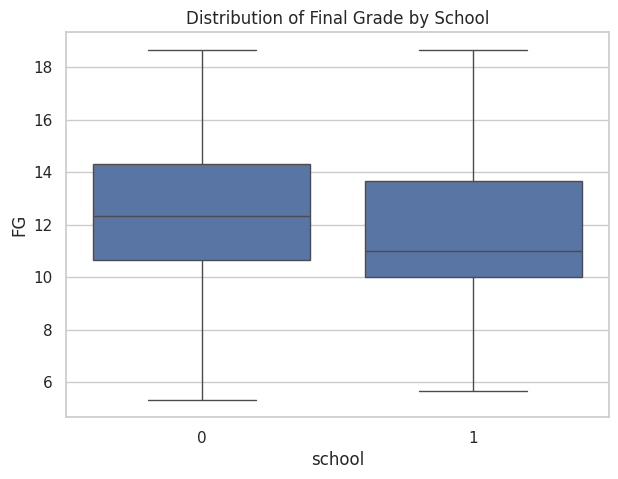

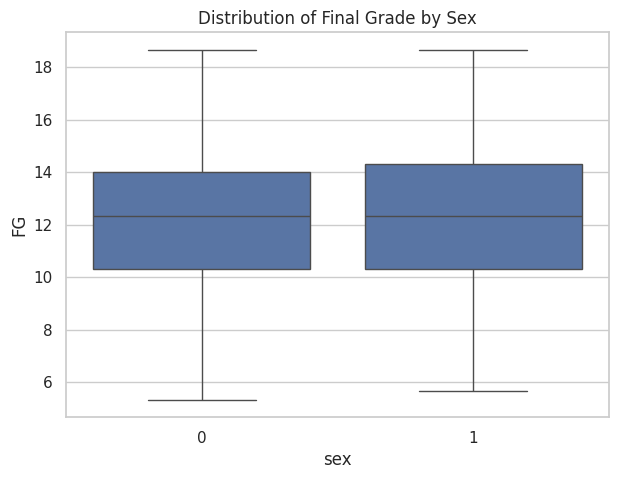

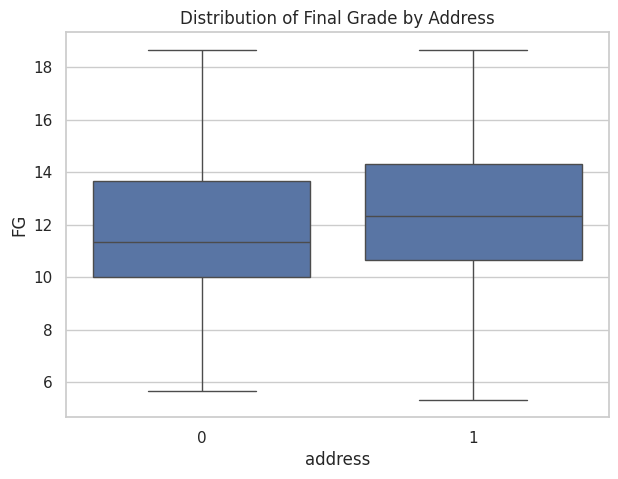

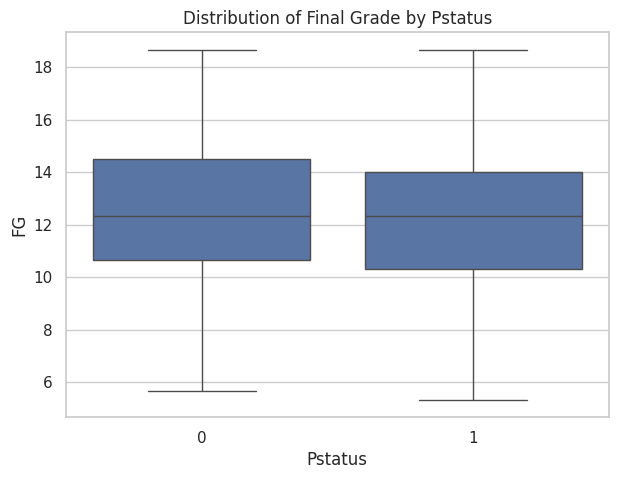

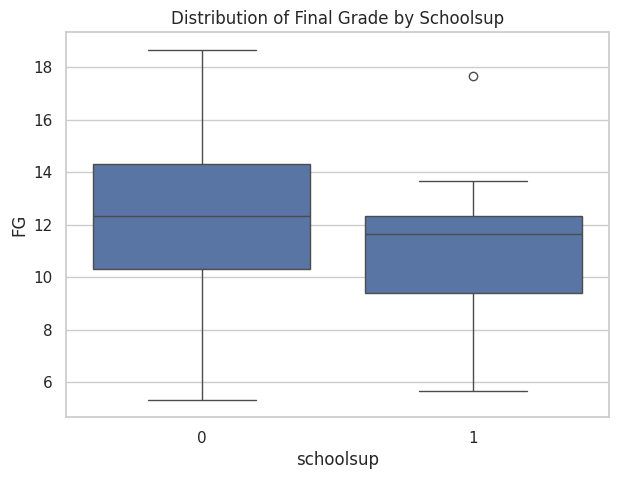

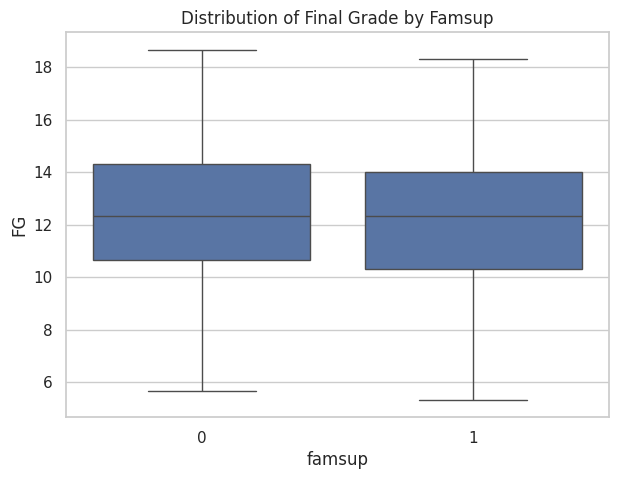

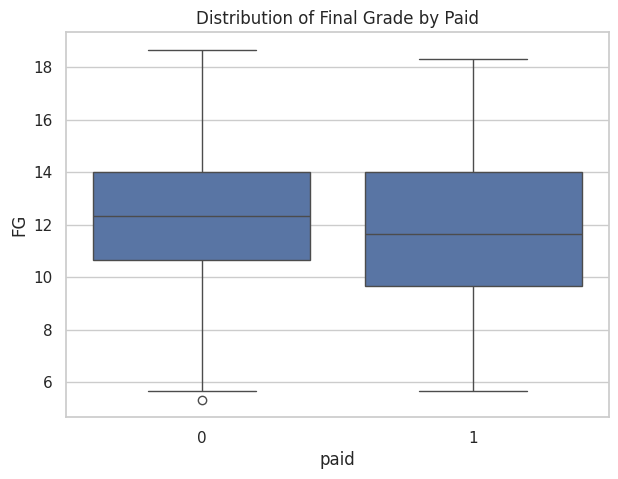

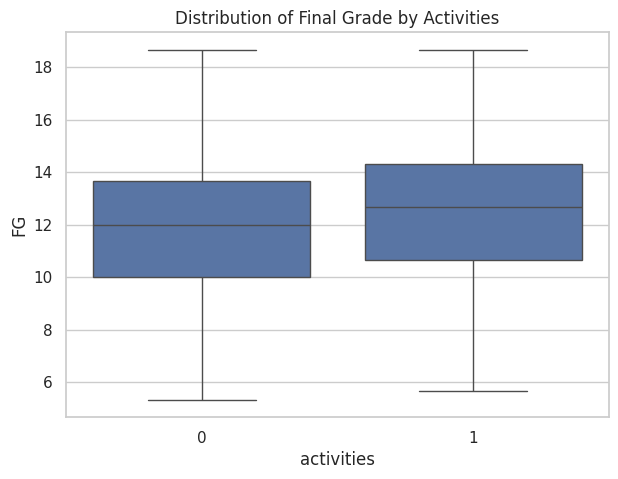

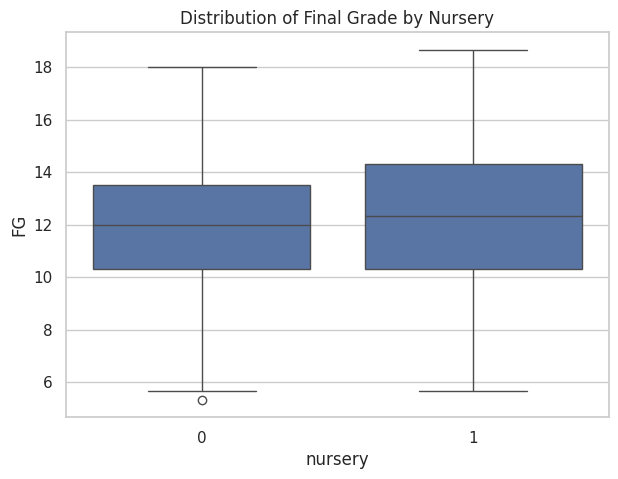

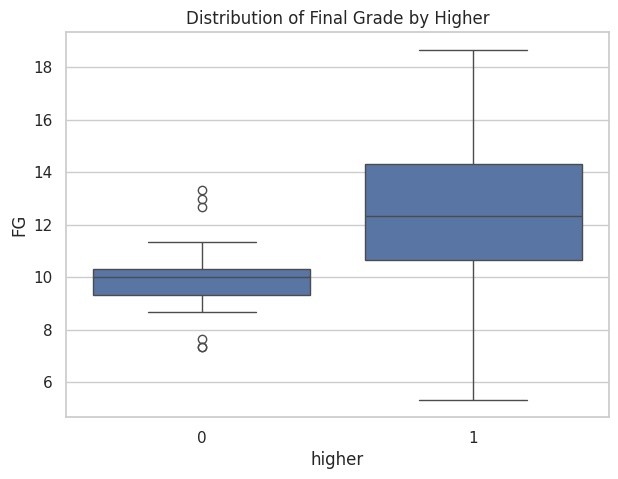

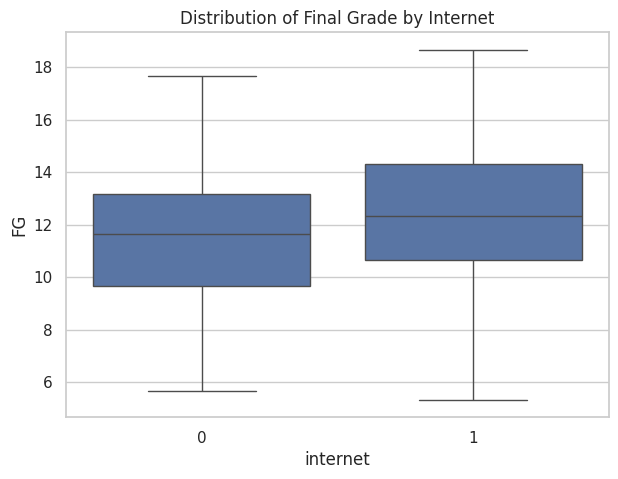

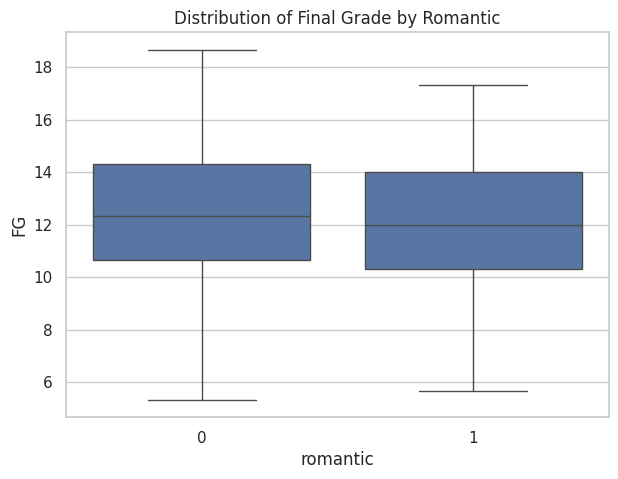

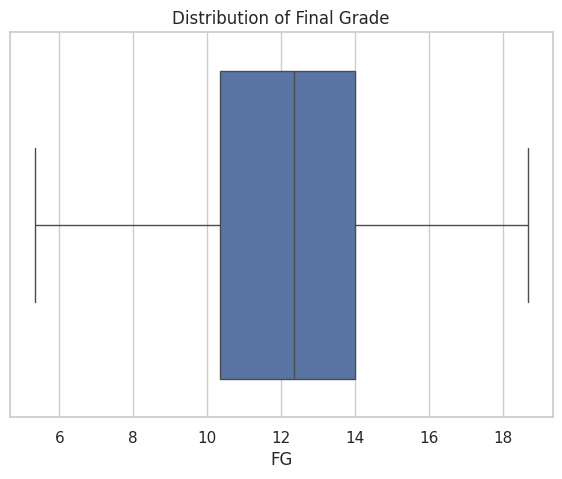

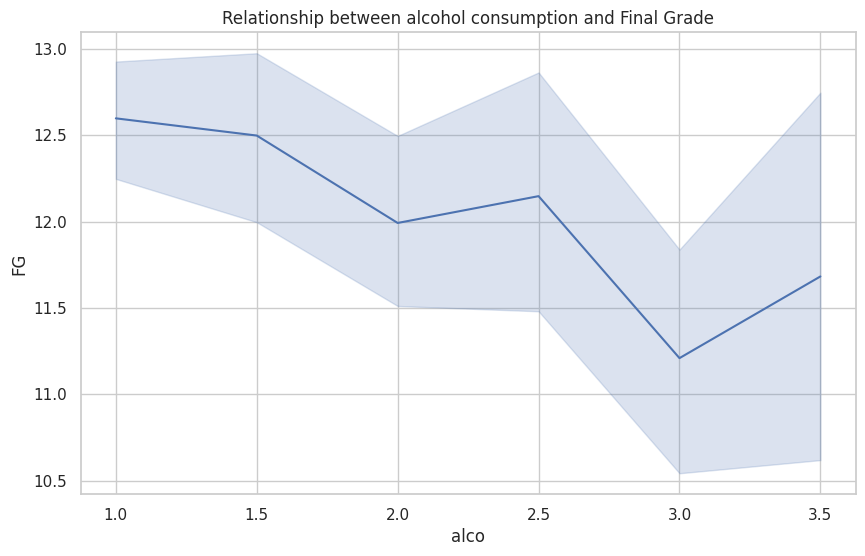

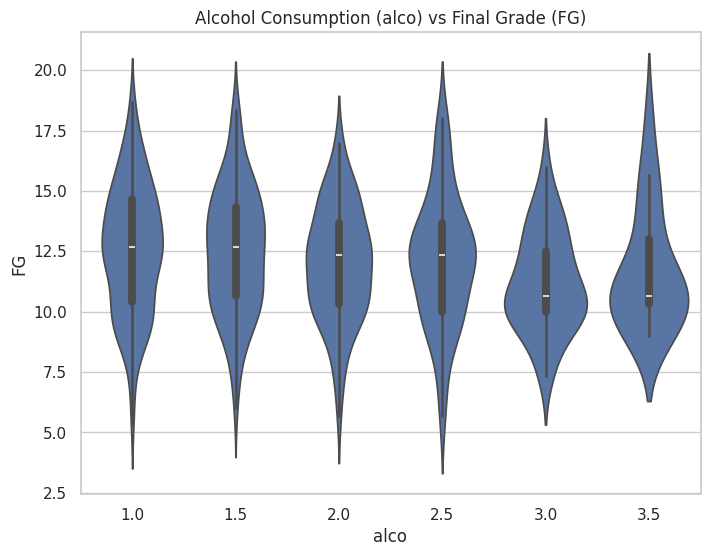

In [17]:
# =============================
# 2. VISUALIZACIÓN INICIAL
# =============================
binary_vars = ['school', 'sex', 'address', 'age', 'Pstatus', 'schoolsup', 'famsup', 'paid',
               'activities', 'nursery', 'higher', 'internet', 'romantic']

for var in binary_vars:
    print(f"\nUnique values for '{var}':\n{student_data[var].unique()}")

if not os.path.exists('plots'):
    os.makedirs('plots')

binary_vars.remove('age')  # ya que es numérica, no binaria
for var in binary_vars:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=var, y='FG', data=student_data)
    plt.title(f'Distribution of Final Grade by {var.capitalize()}')
    plt.savefig(os.path.join('plots', f'FG_by_{var}.png'))
    plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(x='FG', data=student_data)
plt.title('Distribution of Final Grade')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='alco', y='FG', data=student_data)
plt.title('Relationship between alcohol consumption and Final Grade')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='alco', y='FG', data=student_data)
plt.title("Alcohol Consumption (alco) vs Final Grade (FG)")
plt.show()


/tmp/ipython-input-10-1656117756.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=student_data, palette="Set2")
/tmp/ipython-input-10-1656117756.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='school', data=student_data, palette="Set3")
/tmp/ipython-input-10-1656117756.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='address', data=student_data, palette="Pastel1")


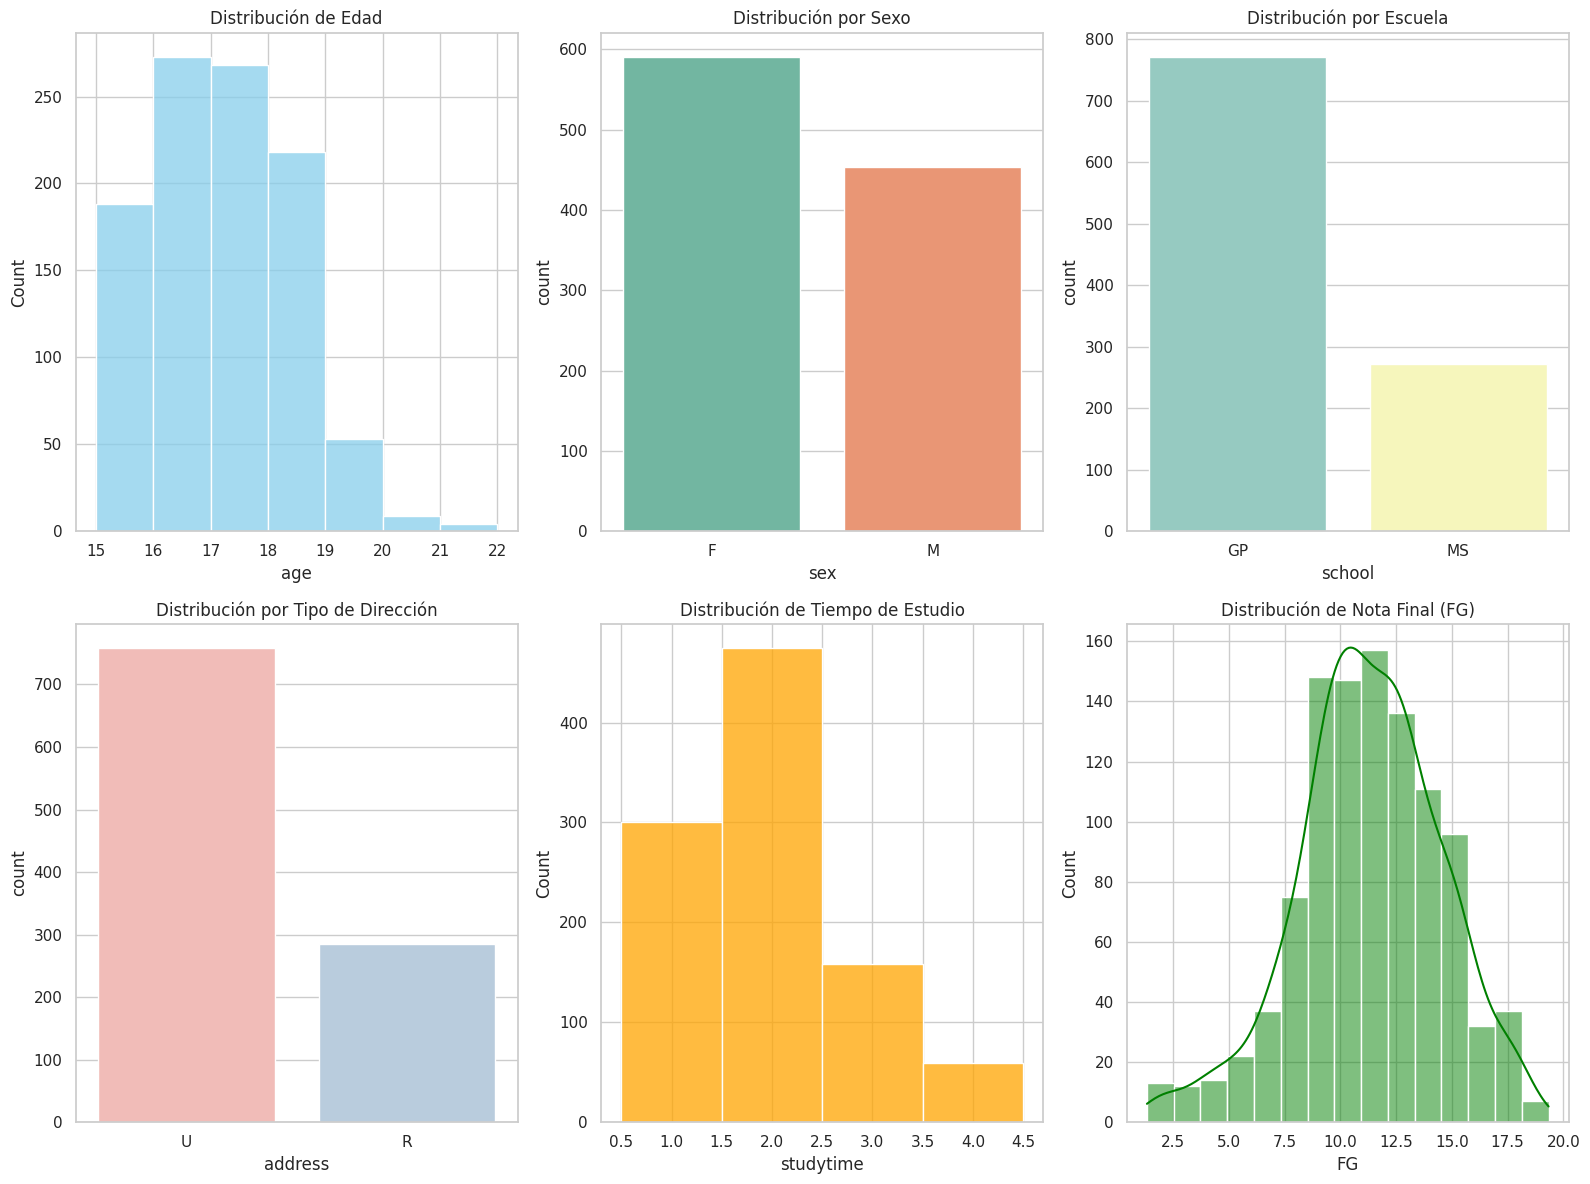

In [10]:
# verificamos si la muestra esta asesgada
# Configuración general de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Histograma de edad
plt.subplot(2, 3, 1)
sns.histplot(student_data['age'], bins=range(15, 23), kde=False, color="skyblue")
plt.title("Distribución de Edad")

# Conteo por sexo
plt.subplot(2, 3, 2)
sns.countplot(x='sex', data=student_data, palette="Set2")
plt.title("Distribución por Sexo")

# Conteo por escuela
plt.subplot(2, 3, 3)
sns.countplot(x='school', data=student_data, palette="Set3")
plt.title("Distribución por Escuela")

# Conteo por tipo de dirección
plt.subplot(2, 3, 4)
sns.countplot(x='address', data=student_data, palette="Pastel1")
plt.title("Distribución por Tipo de Dirección")

# Histograma de tiempo de estudio
plt.subplot(2, 3, 5)
sns.histplot(student_data['studytime'].dropna(), bins=4, discrete=True, color="orange")
plt.title("Distribución de Tiempo de Estudio")

# Histograma de notas finales (G3)
plt.subplot(2, 3, 6)
sns.histplot(student_data['FG'], bins=15, kde=True, color="green")
plt.title("Distribución de Nota Final (FG)")

plt.tight_layout()
plt.show()

In [11]:
# =============================
# 3. LIMPIEZA Y BINARIZACIÓN
# =============================
print(student_data.isnull().sum())

# Select numeric columns
numeric_cols = student_data.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = student_data[col].quantile(0.25)
    Q3 = student_data[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (student_data[col] >= Q1 - 1.5 * IQR) & (student_data[col] <= Q3 + 1.5 * IQR)
    student_data = student_data[mask]

if 'traveltime' in student_data.columns:
    student_data.drop(columns='traveltime', inplace=True)

# Binarizar rendimiento
student_data['performance'] = student_data['FG'].apply(lambda x: 1 if x >= 10 else 0)

# Eliminar columnas redundantes
student_data.drop(columns=['G1', 'G2', 'G3'], inplace=True)

# Codificar variables categóricas
categorical_cols = student_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    student_data[col] = le.fit_transform(student_data[col])

print(student_data.isnull().sum())

school          0
sex             0
age            31
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime    104
studytime      52
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
FG              0
alco            0
dtype: int64
school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0


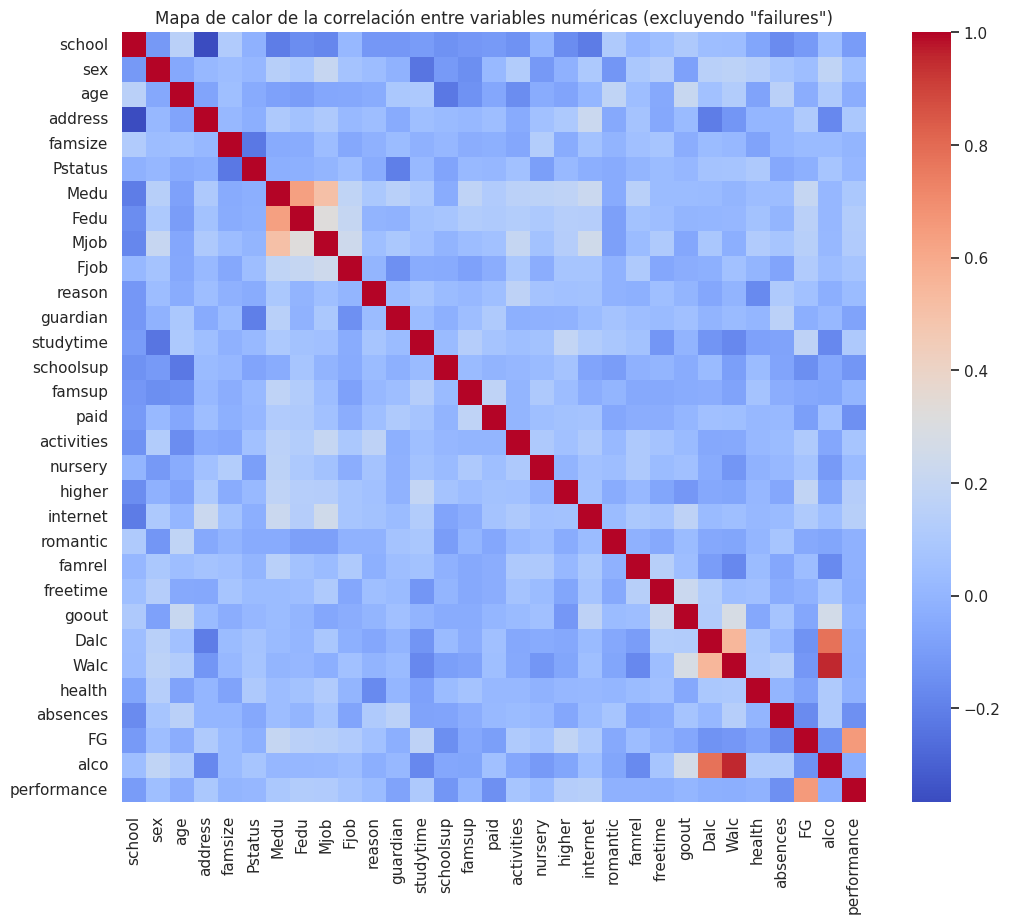

In [12]:
# =============================
# 4. Análisis de correlación
# =============================
#Crea una copia del DataFrame principal para evitar modificar los datos originales mientras se analizan correlaciones y se eliminan columnas
student_data_subset = student_data.copy()
#Elimina la columna 'failures' de student_data_subset.
if 'failures' in student_data_subset.columns:
    student_data_subset.drop(columns='failures', inplace=True)

# Análisis de correlación para variables numéricas
correlation_matrix = student_data_subset.corr(numeric_only=True)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables numéricas (excluyendo "failures")')

# Eliminar columnas binarias con baja varianza (distribución muy sesgada)
low_variance_cols = []
for col in student_data_subset.columns:
    if student_data_subset[col].nunique() == 2:  # Si es binaria
        prop = student_data_subset[col].mean()
        if prop < 0.05 or prop > 0.95:  # Muy desbalanceada
            low_variance_cols.append(col)
#Elimina las columnas identificadas en el paso anterior
student_data_subset.drop(columns=low_variance_cols, inplace=True)

In [13]:
# =============================
# 5. DIVISIÓN DE DATOS
# =============================
X = student_data.drop('performance', axis=1)
y = student_data['performance']

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=69)

In [14]:
# =============================
# 6. ENTRENAMIENTO DE MODELOS
# =============================
# Modelo 1: Regresión Logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Modelo 3: Decision Tree con parámetros ajustados
dt_model = DecisionTreeClassifier(
    random_state=69,
    max_depth=17,
    min_samples_split=20,
    min_samples_leaf=10
)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)



📊 Resultados para Regresión Logística
Accuracy: 0.9571428571428572
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.96      0.99      0.97       171

    accuracy                           0.96       210
   macro avg       0.95      0.90      0.93       210
weighted avg       0.96      0.96      0.96       210



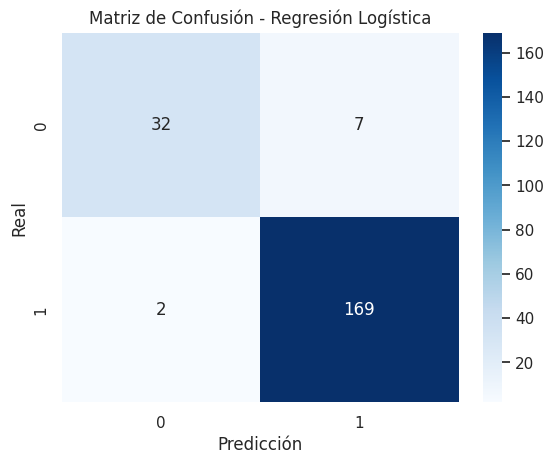


📊 Resultados para Random Forest
Accuracy: 1.0
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       171

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



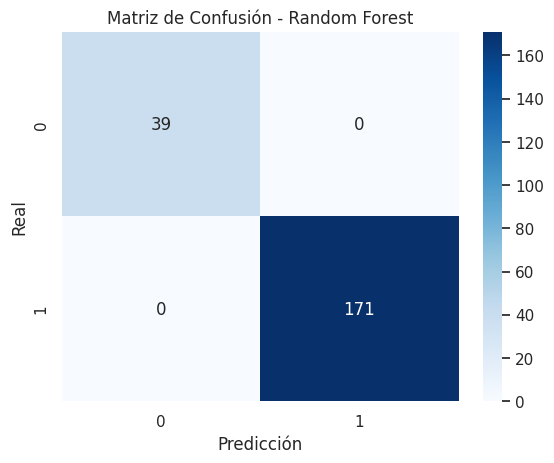


📊 Resultados para Decision Tree
Accuracy: 1.0
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       171

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



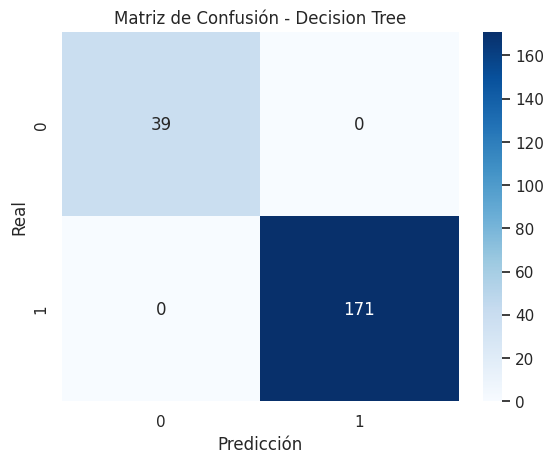

In [15]:
# =============================
# 7. EVALUACIÓN DE MODELOS
# =============================
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n📊 Resultados para {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Reporte de Clasificación:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

evaluar_modelo("Regresión Logística", y_test, log_pred)
evaluar_modelo("Random Forest", y_test, rf_pred)
evaluar_modelo("Decision Tree", y_test, dt_pred)


In [16]:
# =============================
# 8. COMPARACIÓN FINAL
# =============================
print("\n📌 Comparación de Accuracy")
print(f"Regresión Logística: {accuracy_score(y_test, log_pred):.2f}")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.2f}")
print(f"Decision Tree: {accuracy_score(y_test, dt_pred):.2f}")



📌 Comparación de Accuracy
Regresión Logística: 0.96
Random Forest: 1.00
Decision Tree: 1.00
